# Import libraries and dataset

In [19]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
#import AllTogether as t
import seaborn as sns
%matplotlib inline
df1= pd.read_csv(r'f:\Building_Energy\building-energy-benchmarking.csv')
#df1.head()
#df1.info()

In [20]:
import json
f = open('F:\Building_Energy\socrata_metadata_2015-building-energy-benchmarking.json')
data = json.load(f)
#data

# Drop Unnecessary Columns

In [21]:
df1=df1[['BuildingType', 'PrimaryPropertyType','Neighborhood', 'YearBuilt','NumberofFloors', 'SiteEUI(kBtu/sf)',
                    'GHGEmissionsIntensity(kgCO2e/ft2)']]

In [22]:
#Drop row with missing value
df1=df1.dropna()
#df1.info()

In [23]:
#Some PrimaryPropertyType has "/n" clean them 
df1['PrimaryPropertyType']=df1['PrimaryPropertyType'].apply(lambda x:x.replace('\n',"" ))

In [24]:
#Find Median of EUI for different "PrimaryPropertyType"
Site_EUI=df1.groupby(['PrimaryPropertyType'])['SiteEUI(kBtu/sf)'].median().to_frame(name = 'Median SiteEUI(kBtu/sf)').reset_index()
Site_EUI.sort_values(by=['Median SiteEUI(kBtu/sf)'], inplace=True,ascending=False)
#Site_EUI

In [25]:
#Find Median of GHG Emissions Intensity for different "PrimaryPropertyType"
GHG_Emission=df1.groupby(['PrimaryPropertyType'])['GHGEmissionsIntensity(kgCO2e/ft2)'].median().to_frame(name = 'Median GHGEmissionsIntensity(kgCO2e/sf)').reset_index()
GHG_Emission.sort_values(by=['Median GHGEmissionsIntensity(kgCO2e/sf)'], inplace=True,ascending=False)
#GHG_Emission

***Which Types of Buildings Use More Energy?***


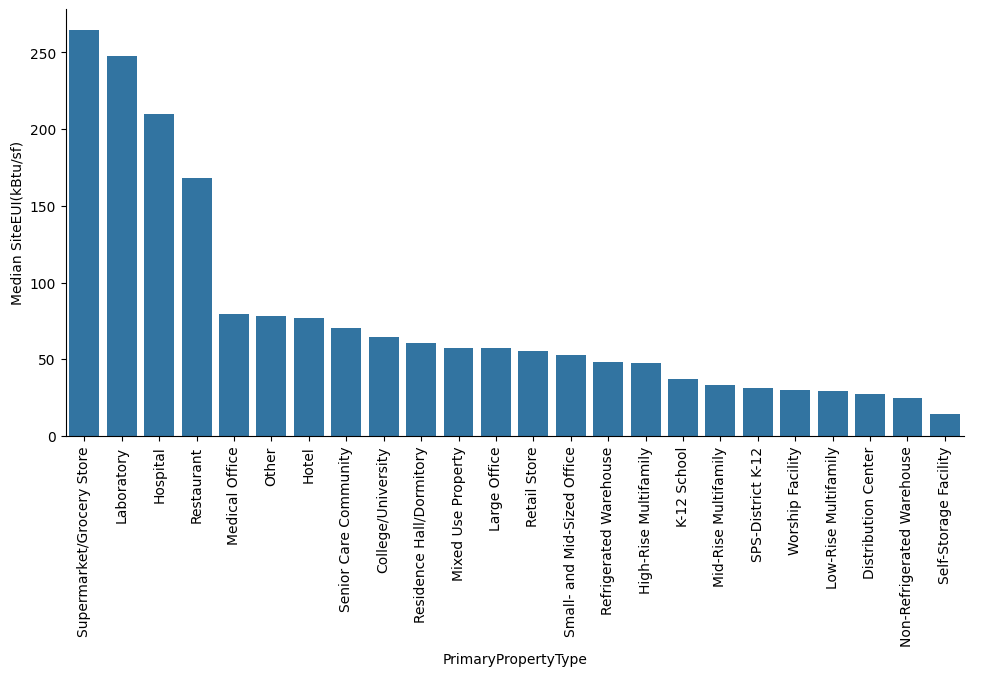

In [26]:
#Print Median EUI bar plot for building Primary Property Type
sns.catplot(x='PrimaryPropertyType', y='Median SiteEUI(kBtu/sf)', data=Site_EUI,height=5,aspect=2,kind='bar')
plt.xticks(rotation=90);

***Which Types of Buildings Contribute Most to Greenhouse Gas Emissions?***


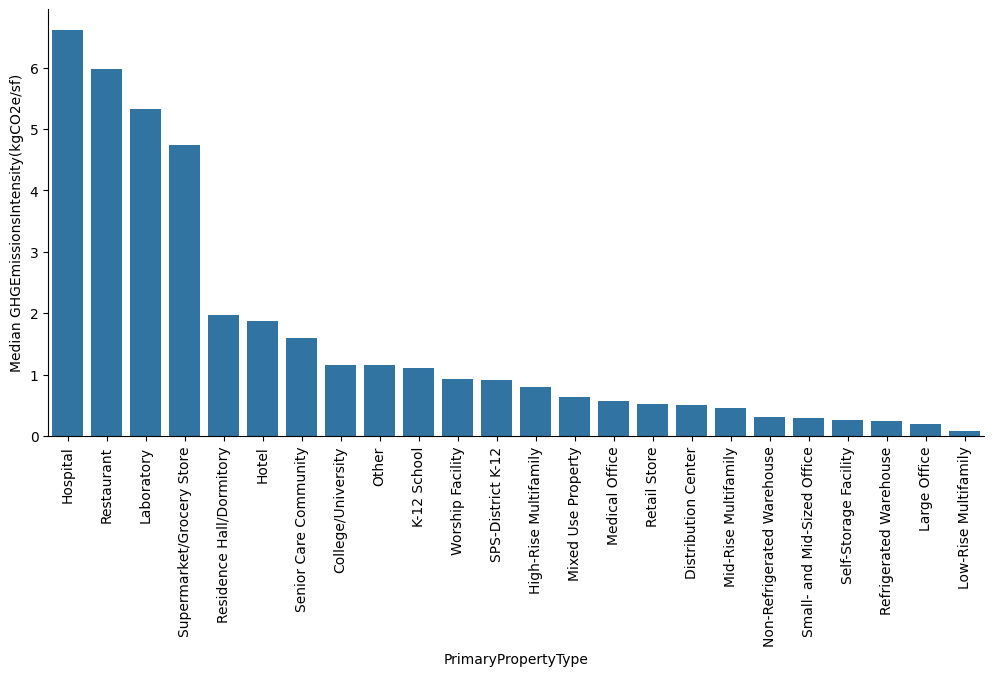

In [27]:
#Print Median GHG Emissions Intensity bar plot for building Primary Property Type
sns.catplot(x='PrimaryPropertyType', y='Median GHGEmissionsIntensity(kgCO2e/sf)', data=GHG_Emission ,height=5,aspect=2,kind='bar')
plt.xticks(rotation=90);

***How Do the Different Buildings Relate to Greenhouse Gas Emissions?***

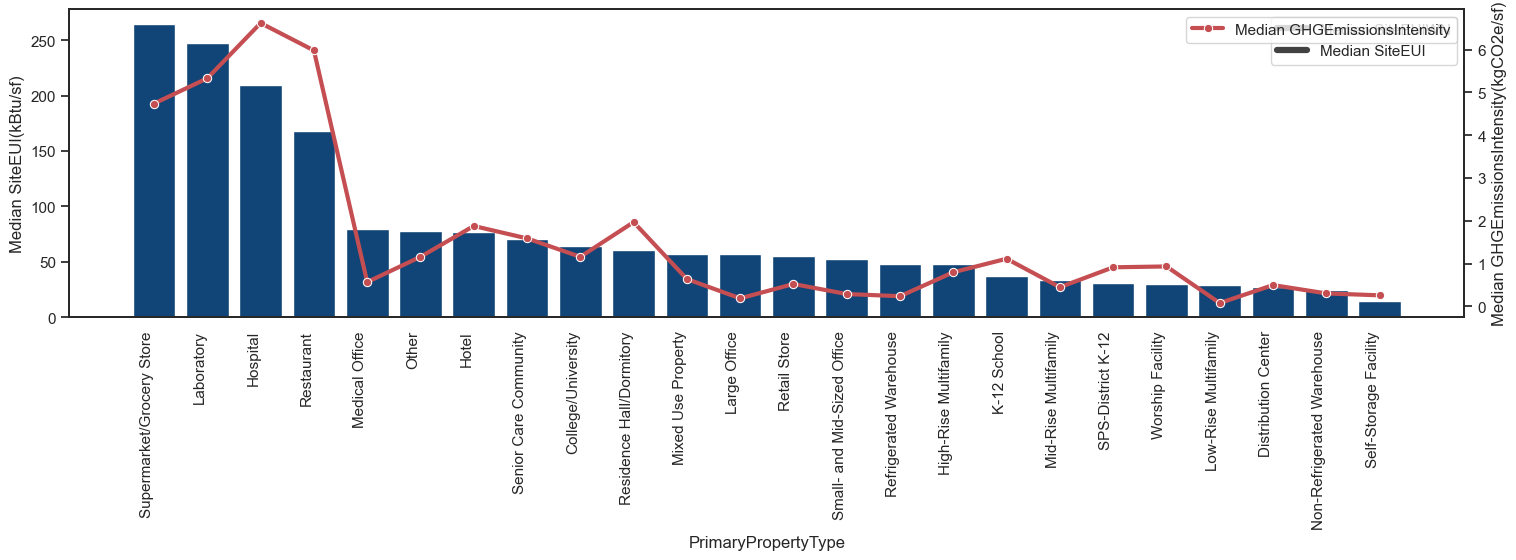

In [28]:
#Print Median EUI bar plot and Median GHG Emissions Intensity line plot for building Primary Property Type
sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax1 = plt.subplots(figsize=(18,4))
plt.xticks(rotation=90, ha='right')
ax2 = ax1.twinx()
sns.barplot(x=Site_EUI['PrimaryPropertyType'], 
             y=Site_EUI['Median SiteEUI(kBtu/sf)'], 
            color='#004488',ax=ax1
           )
plt.xticks(rotation=90)
sns.lineplot(x=GHG_Emission['PrimaryPropertyType'], 
             y=GHG_Emission['Median GHGEmissionsIntensity(kgCO2e/sf)'],
             color='r',
             marker="o",ax=ax2
            )

categorical_1=['Median SiteEUIWN','Median SiteEUI']
ax1.legend(categorical_1, facecolor='w')
categorical_2=['Median GHGEmissionsIntensity']
ax2.legend(categorical_2, facecolor='w')

plt.show()
sns.set()

# Machine Learning Modeles

# Decision Tree Model

In [29]:
from sklearn import preprocessing

from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics, model_selection

In [30]:
df1_ohe = df1
categorical_columns = ['BuildingType', 'PrimaryPropertyType','Neighborhood', 'YearBuilt','NumberofFloors']
for col in categorical_columns:
    col_ohe = pd.get_dummies(df1[col], prefix=col)
    df1_ohe = pd.concat((df1_ohe, col_ohe), axis=1).drop(col, axis=1)

In [31]:
columns=df1.columns

In [32]:
# Define X and y
X = df1_ohe.drop(['SiteEUI(kBtu/sf)', 'GHGEmissionsIntensity(kgCO2e/ft2)'], axis = 1)
y = df1_ohe['SiteEUI(kBtu/sf)'] 

In [33]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, random_state=2, test_size=0.30)

In [34]:
regressor = DecisionTreeRegressor(random_state=0)

In [35]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [36]:
predict=regressor.predict(X_test)

In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 26.83202727229307
MSE: 2616.011006459685
RMSE: 51.14695500672239


C:\Users\pkhsh\AppData\Local\Temp\ipykernel_9852\3675154496.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predict),bins=50);


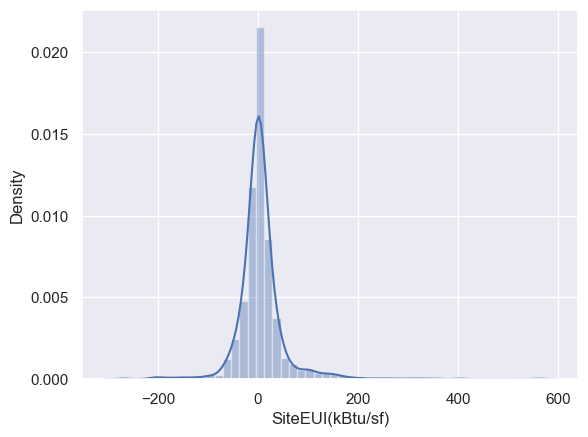

In [38]:
sns.distplot((y_test-predict),bins=50);